In [2]:
%load_ext autoreload
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%autoreload 2
import sys
sys.path.insert(1, '../../SyMBac/')


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib
from matplotlib_scalebar.scalebar import ScaleBar
import tifffile
from microfilm.colorify import cmaps_def
import scipy
import scienceplots
from seaborn import move_legend
from copy import deepcopy
plt.style.use('nature')

matplotlib.rcParams["xtick.minor.bottom"]=False
matplotlib.rcParams["xtick.top"]=False
matplotlib.rcParams["ytick.minor.left"]=False
matplotlib.rcParams["ytick.right"]=False
matplotlib.rcParams["font.size"] = 6
#matplotlib.rcParams["axes.labelpad"] = 0
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["xtick.minor.visible"] = False
matplotlib.rcParams["ytick.minor.visible"] = False
matplotlib.rcParams["xtick.direction"] = "out"
matplotlib.rcParams["ytick.direction"] = "out"
matplotlib.rcParams["legend.fontsize"] = 6
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["xtick.labelsize"] = 6
matplotlib.rcParams["ytick.labelsize"] = 6
matplotlib.rcParams["axes.titlesize"] = 6
matplotlib.rcParams["axes.labelsize"] = 6
matplotlib.rcParams["grid.alpha"] = 0
matplotlib.rcParams["savefig.transparent"] = True
def bin_data_range(bins, column, df, new_column_name):
    return pd.cut(df[column], bins=bins, labels=[i for i in ([f"[{int(x.left+1)}, {int(x.right+1)})"  for x in pd.cut(df[column], bins=bins).unique()]) ])


def bin_data_mid(bins, column, df, new_column_name):
    return pd.cut(df[column], bins=bins, labels=[i for i in sorted([x.mid  for x in pd.cut(df[column], bins=bins).unique()]) ])


data = pd.read_pickle("../../microcolony_analysis/real_data_segmentation_notebooks/agar_pad_with_deconv.pickle")
data["Distance from centre of colony"] = np.sqrt(
    (data["Cell y"] - data["Colony centroid y"])**2 + (data["Cell x"] - data["Colony centroid x"])**2 
)
data["Normalised distance from centre of colony"] = data["Distance from centre of colony"] / (data["Colony diameter"]/2)
data["Mean true intensity"] = data["True intensity"] / data["Area"]
data["Mean observed intensity"] = data["Observed intensity"] / data["Area"]

data["Mean deconvolved intensity"] = data["Deconvolved intensity"] / data["Area"]

data = data[(data["Mean true intensity"] > 0)]
data["Colony N cells (binned)"] = bin_data_range(bins = 3, df=data, column="Colony N cells", new_column_name="Colony N cells (binned)")
data["Normalised distance from centre of colony (binned)"] = bin_data_mid(bins=19, df = data, column = "Normalised distance from centre of colony", new_column_name=None)
colony_plot_data = pd.read_pickle("../../microcolony_analysis_giant_lorentz/cell_data_giant_lorentz.pickle")#pd.read_pickle("../../microcolony_analysis/microcolony_plotting_data.pickle")

colony_plot_data["Intensity foldchange"] = colony_plot_data["Mean observed intensity"]/colony_plot_data.query("`Colony N cells` == 1")["Mean observed intensity"].mean()

In [3]:
colony_plot_data["NA"].unique()

array(['Empirical 1.49'], dtype=object)

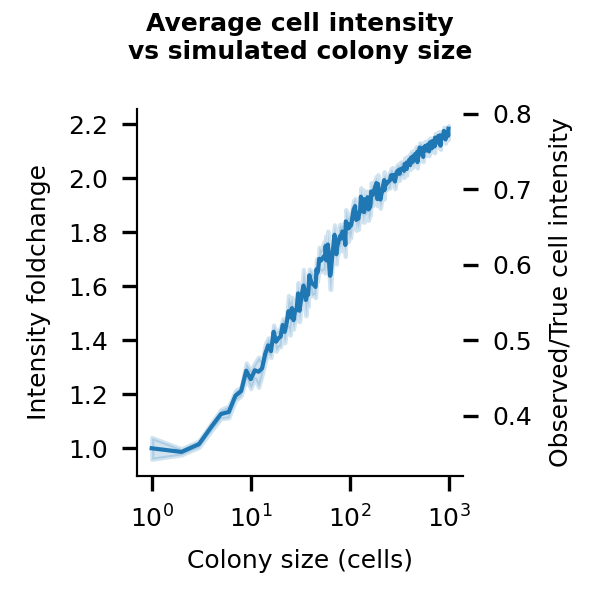

In [42]:
fig, INTENSITY_VS_N_CELLS = plt.subplots(1,1, figsize=(2,2), dpi = 300)


sns.lineplot(
    data = colony_plot_data.query("(`True CV` < 0.05 & `NA` == 'Empirical 1.49') or (`Colony N cells` == 1 & `NA` == 'Empirical 1.49')"),
    x = "Colony N cells",
    y = "Intensity foldchange",
    hue = "NA",
    style = "NA", 
    errorbar=('ci', 99), legend = False
)
plt.xscale("log")
plt.suptitle("Average cell intensity\nvs simulated colony size", fontsize=6)
plt.xlabel("Colony size (cells)")

ax2 =  INTENSITY_VS_N_CELLS.twinx()

sns.lineplot(
    data = colony_plot_data.query("(`True CV` < 0.05 ) or (`Colony N cells` == 1)"),
    x = "Colony N cells",
    y = "Observed cell intensity / True cell intensity (mean)",
    hue = "NA",
    style = "NA", 
    errorbar=None, legend = False, ax = ax2, alpha = 0, 
)
plt.xscale("log")
plt.suptitle("Average cell intensity\nvs simulated colony size", fontsize=6, weight = "bold")
plt.ylabel("Observed/True cell intensity")


plt.tight_layout()
plt.savefig("c.svg")
plt.show()
plt.close()


/tmp/ipykernel_3723/4028959751.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data.query("`Colony N cells` <= @max_sim_size"), x = "Colony N cells", y = "Intensity foldchange", palette="set2", label = "Real colony")


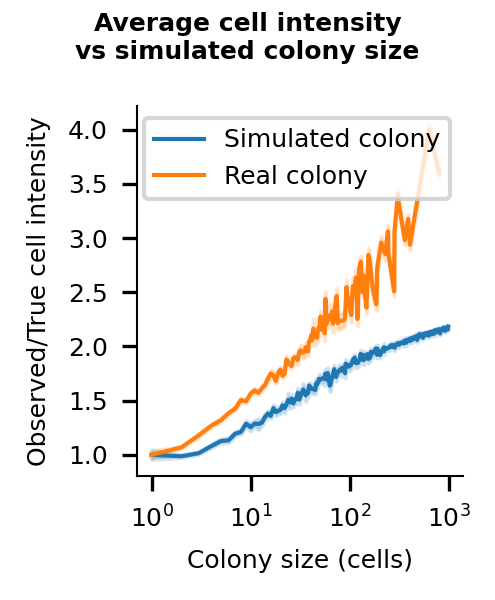

In [43]:
fig, INTENSITY_N_CELLS = plt.subplots(1,1, figsize=(1.65,2), dpi = 300)


sns.lineplot(
    data = colony_plot_data.query("(`True CV` < 0.05 & `NA` == 'Empirical 1.49') or (`Colony N cells` == 1 & `NA` == 'Empirical 1.49')"),
    x = "Colony N cells",
    y = "Intensity foldchange",
    hue = "NA",
    style = "NA", 
    errorbar=('ci', 99), legend = False, label = "Simulated colony"
)
plt.xscale("log")
plt.suptitle("Average cell intensity\nvs simulated colony size", fontsize=6)
plt.xlabel("Colony size (cells)")


plt.xscale("log")
plt.suptitle("Average cell intensity\nvs simulated colony size", fontsize=6, weight = "bold")
plt.ylabel("Observed/True cell intensity")
sns.lineplot(data=data.query("`Colony N cells` <= @max_sim_size"), x = "Colony N cells", y = "Intensity foldchange", palette="set2", label = "Real colony")


plt.tight_layout()
plt.savefig("f.svg")
plt.show()
plt.close()


/tmp/ipykernel_3723/2246180755.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data.query("`Colony N cells` <= @max_sim_size"), x = "Colony N cells", y = "Intensity foldchange", palette="set2")


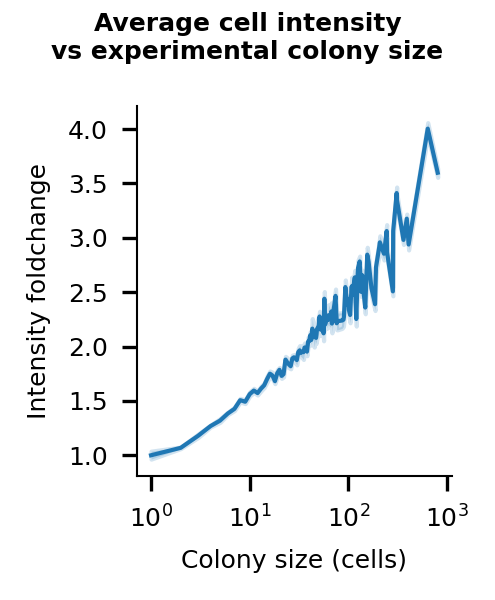

In [5]:
fig, INTENSITY_N_CELLS = plt.subplots(1,1, figsize=(1.65,2), dpi = 300)

column = "Mean observed intensity"
data[column] = data[column]*0.003
data["Intensity foldchange"] = data[column] / data.query("`Colony N cells` == 1")["Mean observed intensity"].mean()# 4.2*0.003

max_sim_size = colony_plot_data["Colony N cells"].max()

sns.lineplot(data=data.query("`Colony N cells` <= @max_sim_size"), x = "Colony N cells", y = "Intensity foldchange", palette="set2")
plt.xscale("log")
plt.suptitle("Average cell intensity\nvs experimental colony size", fontsize=6, weight = "bold")
plt.xlabel("Colony size (cells)")
plt.tight_layout()
plt.savefig("f.svg")
plt.show()
plt.close()

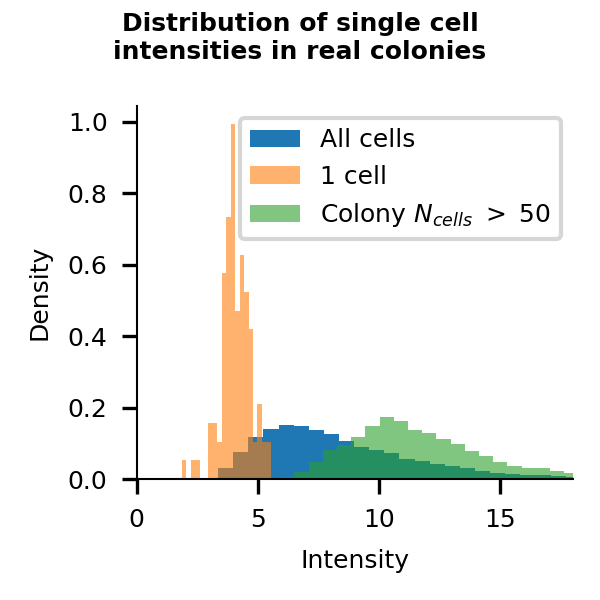

In [6]:
fig, INTENSITY_DISTRIBUTION = plt.subplots(1,1, figsize=(2,2), dpi = 300)

plt.hist(data["Mean observed intensity"],bins=40, density=True)
plt.hist(data.query("`Colony N cells` == 1 & `Mean observed intensity` < 2000*0.003")["Mean observed intensity"],bins=20, density=True, alpha=0.6)
plt.hist(data.query("`Colony N cells` > 50")["Mean observed intensity"],bins=40, density=True, alpha=0.6)
plt.xlim(0,6000*0.003)
plt.legend(["All cells", "1 cell",  r"Colony $N_{cells}$ $>$ 50"])
plt.ylabel("Density")
plt.xlabel("Intensity")
plt.suptitle("Distribution of single cell\nintensities in real colonies", fontsize=6, weight = "bold")
plt.tight_layout()
plt.savefig("e.svg")

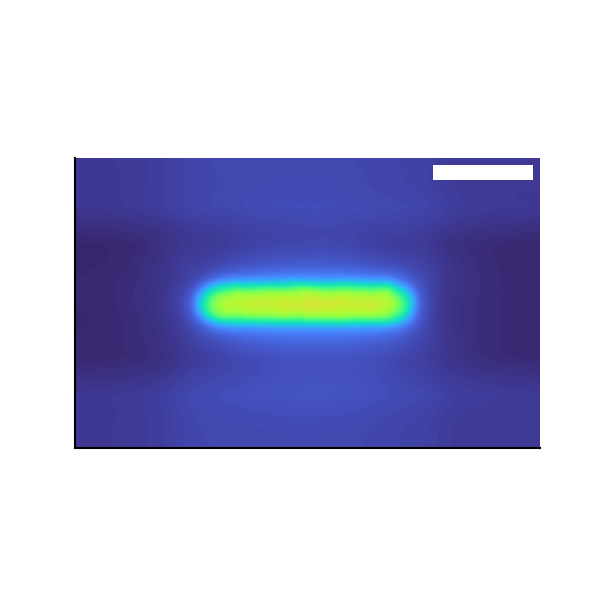

In [14]:
colony_ID_low_CV = 315
colony_ID_high_CV = colony_ID_low_CV + 2844

single_cell_colony_conv = tifffile.imread(f"../../microcolony_analysis/simulated_colonies_empirical_PSF/training_data_100x_0.55_green_1.49_1.518//synth_imgs/{str(colony_ID_low_CV-30).zfill(4)}.tif")
low_CV_conv = tifffile.imread(f"../../microcolony_analysis/simulated_colonies_normal/training_data_100x_0.55_green_1.49_1.518/synth_imgs/{str(colony_ID_low_CV).zfill(4)}.tif")
ten_cell_colony_conv = tifffile.imread(f"../../microcolony_analysis/simulated_colonies_empirical_PSF/training_data_100x_0.55_green_1.49_1.518//synth_imgs/{str(colony_ID_low_CV-17).zfill(4)}.tif")
hundred_cell_colony_conv = tifffile.imread(f"../../microcolony_analysis/simulated_colonies_empirical_PSF/training_data_100x_0.55_green_1.49_1.518//synth_imgs/{str(colony_ID_low_CV-6).zfill(4)}.tif")
high_CV_conv = tifffile.imread(f"../../microcolony_analysis/simulated_colonies_normal/training_data_100x_0.55_green_1.49_1.518/synth_imgs/{str(colony_ID_high_CV).zfill(4)}.tif")

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

ax.imshow(single_cell_colony_conv, cmap="turbo", vmin=0,vmax = low_CV_conv.max()*0.6) 
ax.set_yticks([])
ax.set_xticks([])
scalebar = ScaleBar(0.05, "um", label_loc=None,scale_loc =  "none",  box_alpha=0, color="white", length_fraction=0.5, width_fraction = 0.05) # 2 micron
ax.add_artist(scalebar)
plt.savefig("b_1.svg")

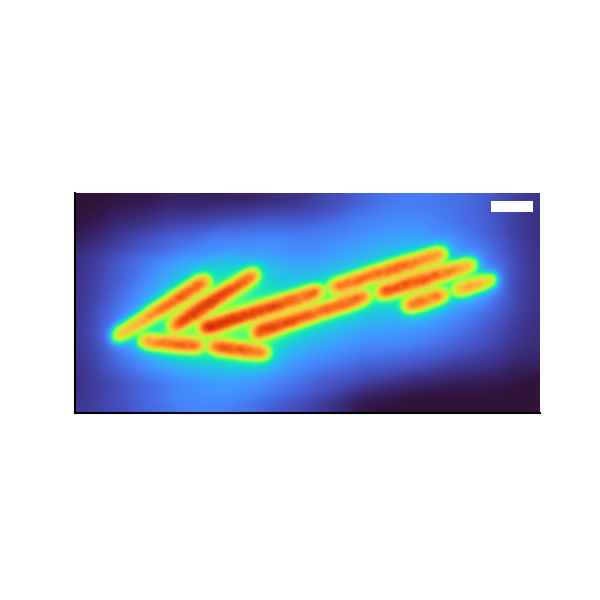

In [16]:



fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

ax.imshow(ten_cell_colony_conv[:,15:-10], cmap="turbo", vmin=0,vmax = low_CV_conv.max()*0.6 ) 
ax.set_yticks([])
ax.set_xticks([])

scalebar = ScaleBar(0.05, "um", label_loc=None, box_alpha=0, scale_loc =  "none", color="white", width_fraction = 0.05, length_fraction=0.15) # 2 micron 
ax.add_artist(scalebar)
plt.savefig("b_2.svg")

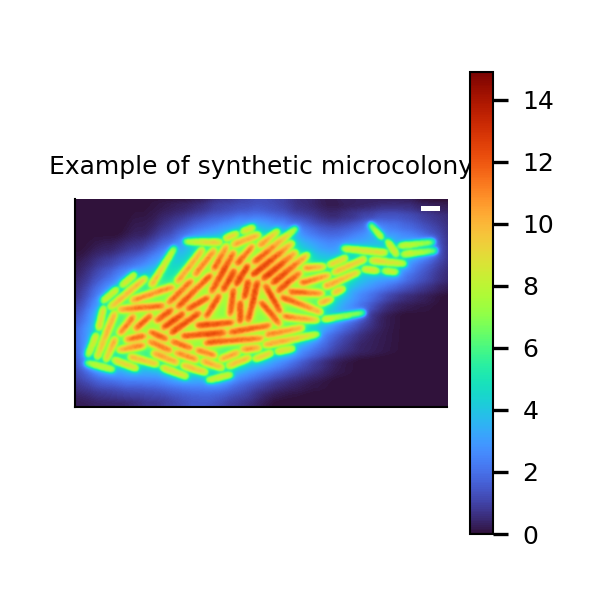

In [24]:

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)
_ = plt.imshow(hundred_cell_colony_conv[:,30:-30], cmap="turbo", vmin=0,vmax = high_CV_conv.max()*0.6 ) 
ax.set_yticks([])
ax.set_xticks([])

scalebar = ScaleBar(0.05, "um", label_loc=None, scale_loc =  "none", box_alpha=0, color="white", length_fraction=0.1, width_fraction = 0.025) # 15 micron
ax.add_artist(scalebar)

fig.colorbar(_, ax=ax)
plt.title("Example of synthetic microcolony")
plt.savefig("b_3.svg")

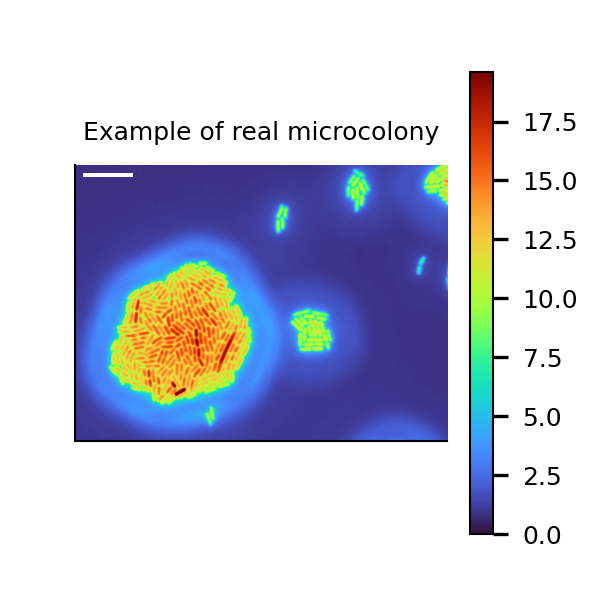

In [32]:
import nd2
microcolony = nd2.imread("../../microcolony_analysis/real_data/agar_pads/100x_SB5_dilute002.nd2", xarray=True, dask=True)
microcolony_img = microcolony[0][1][650:-400,610:]

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

_ = ax.imshow(microcolony_img*0.003, cmap="turbo", vmax = 7000*0.0028, vmin=0)
fig.colorbar(_, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
scalebar = ScaleBar(0.065/1.5, "um", length_fraction=0.15, scale_loc="none",  location = "upper left", box_alpha=0,  color="white", box_color="k", width_fraction = 0.017)  # 10 micron
ax.add_artist(scalebar)
plt.title("Example of real microcolony")
plt.savefig("c.svg")


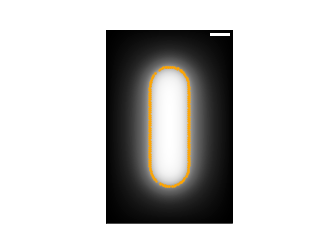

In [38]:
from skimage.segmentation import find_boundaries
from SyMBac.drawing import raster_cell, convert_to_3D
from SyMBac.renderer import convolve_rescale
from SyMBac.PSF import PSF_generator

pix_mic_conv = (0.065/1.5)/4

cell_length = 3
cell_width = 1
raster_cell_length = cell_length / pix_mic_conv
raster_cell_width = cell_width / pix_mic_conv

my_kernel = PSF_generator(
    radius = 100, 
    wavelength = 0.515, 
    NA=1.49, 
    n = 1.518, 
    resize_amount=1, 
    pix_mic_conv=pix_mic_conv, 
    apo_sigma = 10, 
    mode="3d fluo", 
    condenser="Ph3", 
    z_height = int(raster_cell_width),
    pz=0.5,
    working_distance = 170
)
my_kernel.calculate_PSF()
psf = my_kernel.kernel.sum(axis=0)
#psf = np.array([layer/layer.sum() for layer in psf])
psf /= psf.sum()
cell_length = 3
cell_width = 1
raster_cell_length = cell_length / pix_mic_conv
raster_cell_width = cell_width / pix_mic_conv

single_cell = (raster_cell(raster_cell_length, raster_cell_width, separation=0))

single_cell = np.pad(single_cell, (  (250-int(raster_cell_width//2), 250-int(raster_cell_width//2)), (250,250)))

single_cell_3D = convert_to_3D(single_cell)


single_cell_conv = convolve_rescale(single_cell_3D.astype(np.float32).sum(axis=0), psf, 1, False) 


single_cell = single_cell[120:-120:,150:-150]
single_cell_conv = single_cell_conv[120:-120:,150:-150]
boundaries = np.argwhere(find_boundaries(single_cell>0))

fig, ax = plt.subplots()
ax.imshow(single_cell_conv**0.5, cmap="Greys_r")
scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.2, scale_loc="none", width_fraction = 0.02,  box_alpha=0,  color="white", box_color="k") # 500 micron
ax.scatter(boundaries[:,1][::5], boundaries[:,0][::5], c = "orange", s = 0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.add_artist(scalebar)
plt.savefig("a_2.svg")

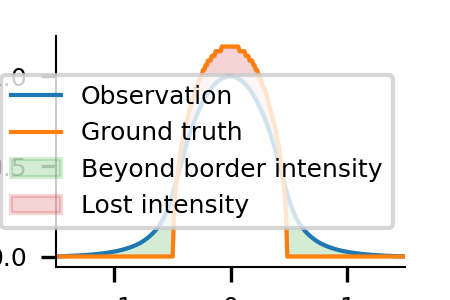

In [67]:
pix_mic_conv = (0.065/1.5)/4

cell_length = 3
cell_width = 1
raster_cell_length = cell_length / pix_mic_conv
raster_cell_width = cell_width / pix_mic_conv

single_cell = (raster_cell(raster_cell_length, raster_cell_width, separation=0))

single_cell = np.pad(single_cell, (  (250-int(raster_cell_width//2), 250-int(raster_cell_width//2)), (250,250)))




my_kernel = PSF_generator(
    radius = 100, 
    wavelength = 0.515, 
    NA=1.49, 
    n = 1.518, 
    resize_amount=1, 
    pix_mic_conv=pix_mic_conv, 
    apo_sigma = 10, 
    mode="3d fluo", 
    condenser="Ph3", 
    z_height = int(raster_cell_width),
    pz=0.5,
    working_distance = 170
)
my_kernel.calculate_PSF()
psf = my_kernel.kernel.sum(axis=0)
#psf = np.array([layer/layer.sum() for layer in psf])
psf /= psf.sum()

single_cell_3D = convert_to_3D(single_cell)
single_cell_conv = convolve_rescale(single_cell_3D.astype(np.float32).sum(axis=0), psf, 1, False) 

ss_trace = single_cell_conv[single_cell_conv.shape[0]//2,:]
ss_trace_padded = np.pad(ss_trace,(0,int(round(raster_cell_width))))
ss_trace_padded2 = np.pad(ss_trace,(int(round(raster_cell_width)),0))


fig, ax = plt.subplots(1,1, figsize=(1.5,1), dpi = 300)
y1 = ss_trace/ss_trace.max()
y2 = single_cell_3D.sum(axis=0)[360,:]/ss_trace.max()
x = np.arange(-len(ss_trace)/2, len(ss_trace)/2) * pix_mic_conv
plt.plot(x, y1)
plt.plot(x, y2)

plt.fill_between(x, y1, y2, where=(y1>y2), color = "C2", alpha = 0.2)
plt.fill_between(x, y1, y2, where=(y1<y2), color = "C3", alpha = 0.2)
plt.xlim(-1.5,1.5)
plt.legend(["Observation","Ground truth", "Beyond border intensity", "Lost intensity"])
plt.xlabel("Profile $\mu m$")
plt.ylabel("Intensity (AU)")
plt.savefig("a.svg")